C:\Users\olbon.DESKTOP-U9M7616\AppData\Local\Temp\ipykernel_26264\3891264283.py:17: DtypeWarning: Columns (34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


‚úÖ Donn√©es charg√©es : 140247 lignes
Colonnes : ['Ann√©e', 'Num√©ro', 'D√©partement', 'code_insee', 'Nom de la commune', 'Date de premi√®re alerte', 'Surface parcourue (m2)', 'Surface for√™t (m2)', 'Surface maquis garrigues (m2)', 'Type de peuplement', 'Nature', 'Ann√©e_calc', 'mois', 'jour', 'jour_semaine', 'mois_jour_code', 'jour_de_l_annee', 'cos_jour', 'sin_jour', 'is_weekend', 'is_public_holiday', 'is_school_vacation', 'est_jour_ouvre', 'surface_ha', 'nom_standard', 'latitude_centre', 'longitude_centre', 'nom_commune_finale', 'periode', 'Surfaces non bois√©es (m2)', 'Autres surfaces naturelles hors for√™t (m2)', 'Surface autres terres bois√©es (m2)', 'Surfaces non bois√©es naturelles (m2)', 'Surfaces non bois√©es artificialis√©es (m2)', 'Pr√©cision de la donn√©e', 'Pr√©cision des surfaces', 'D√©c√®s ou b√¢timents touch√©s', 'Surfaces agricoles (m2)', 'Autres surfaces (m2)', 'Nombre de d√©c√®s', 'Nombre de b√¢timents totalement d√©truits', 'Nombre de b√¢timents partiellement d√©t

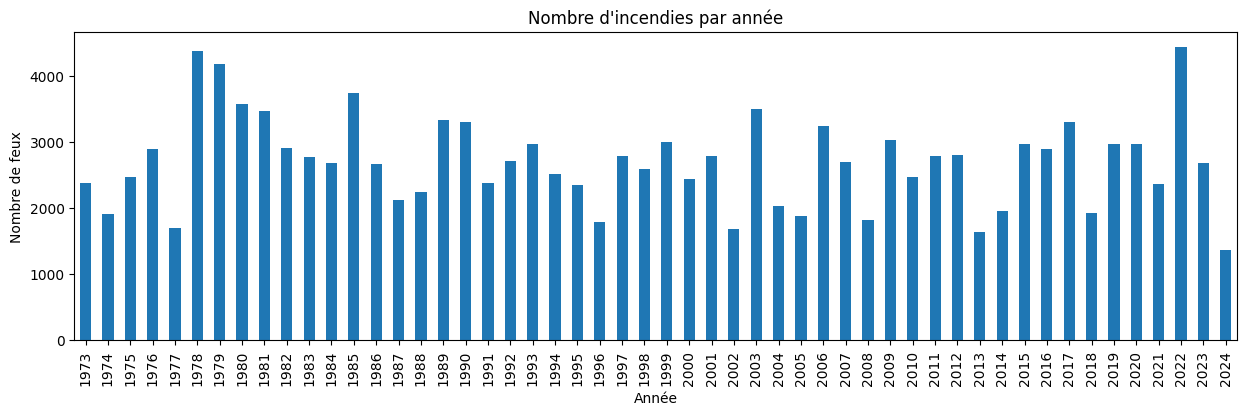

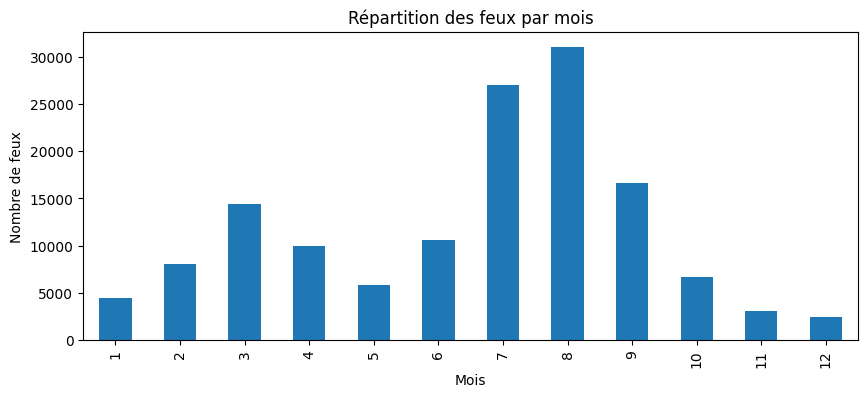

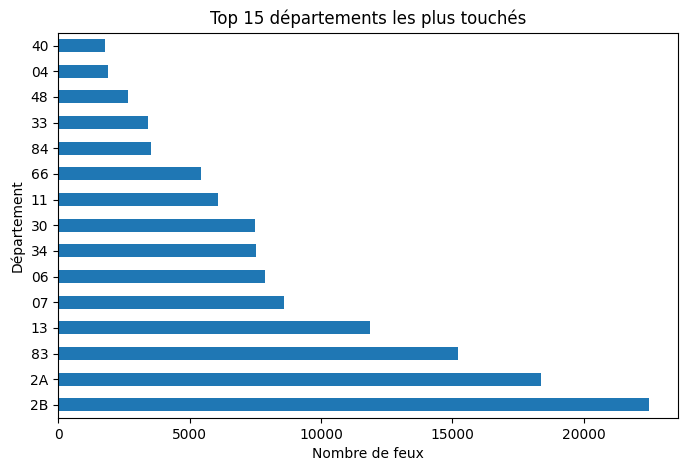

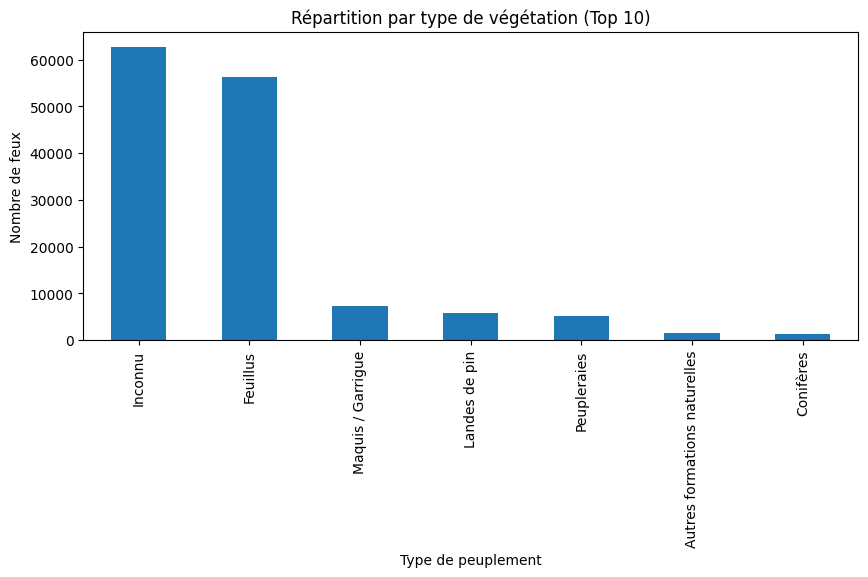

Type de peuplement libell√©
Inconnu                         62732
Feuillus                        56332
Maquis / Garrigue                7218
Landes de pin                    5778
Peupleraies                      5218
Autres formations naturelles     1621
Conif√®res                        1348
Name: count, dtype: int64


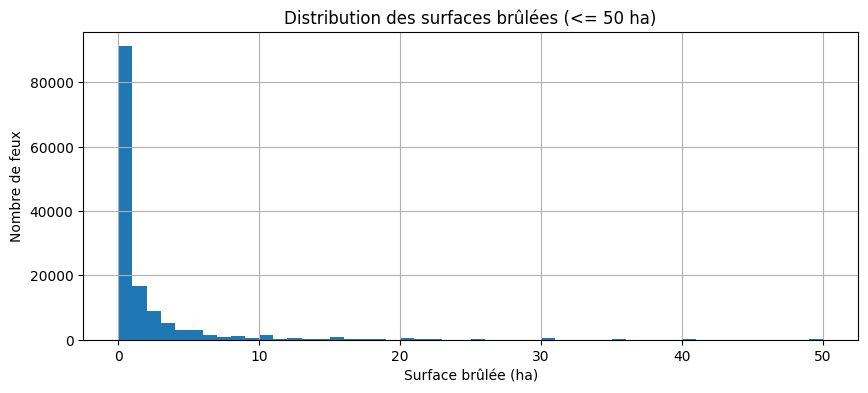

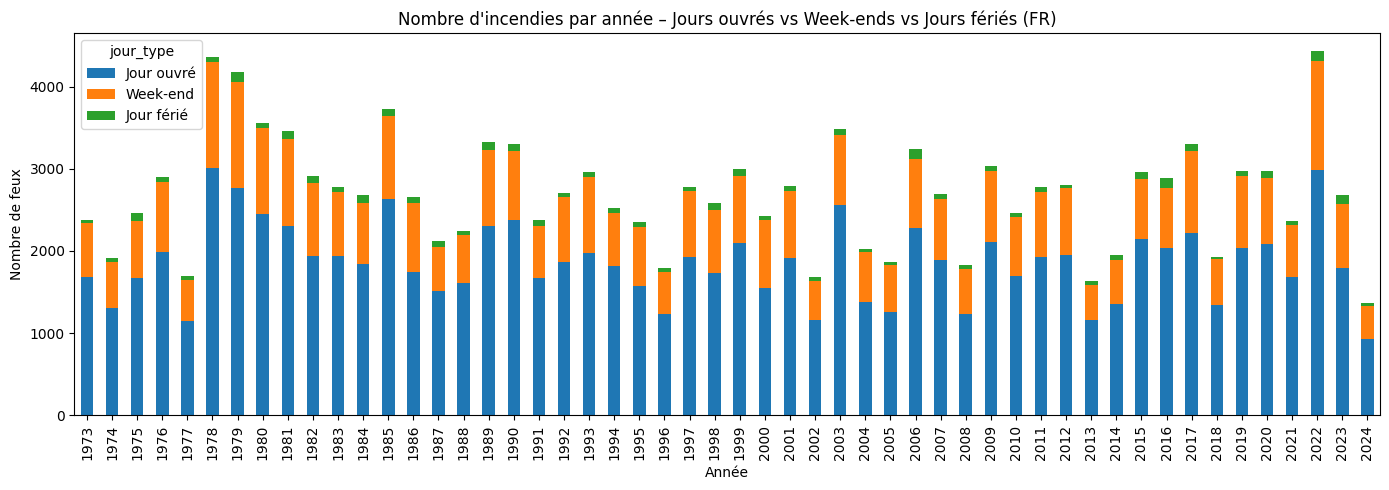

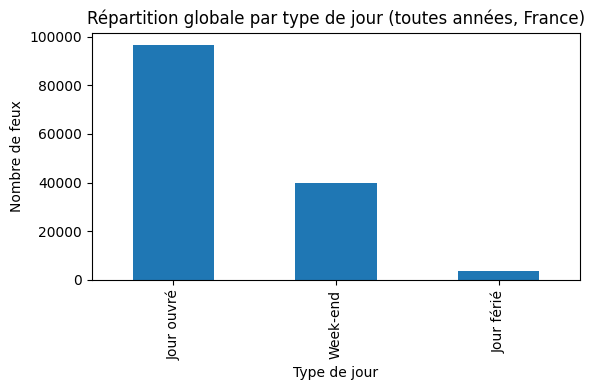

Pourcentages globaux (%):
jour_type
Jour ouvr√©    69.0
Week-end      28.5
Jour f√©ri√©     2.5
Name: count, dtype: float64


c:\Users\olbon.DESKTOP-U9M7616\OneDrive\Bureau\Olivier\La Plate-forme\Work\terre-vent-feu-eau-data\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\olbon.DESKTOP-U9M7616\OneDrive\Bureau\Olivier\La Plate-forme\Work\terre-vent-feu-eau-data\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Clusters HDBSCAN trouv√©s (hors bruit) : 1434


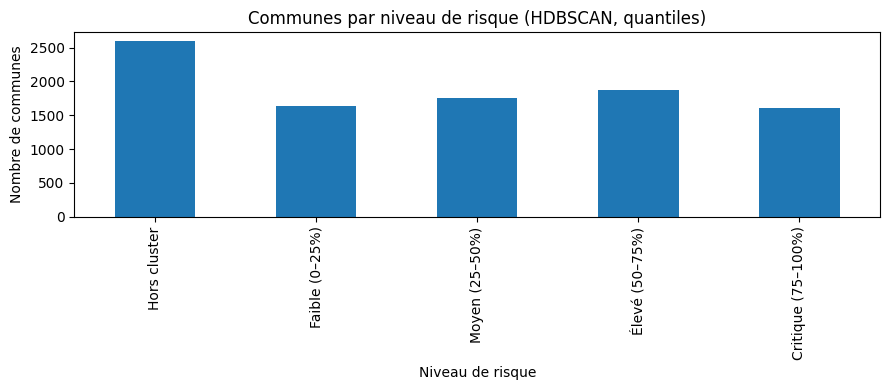

Carte enregistr√©e ‚Üí data\processed\carte_hdbscan_risque.html


WindowsPath('data/processed/carte_hdbscan_risque.html')

In [ ]:
# === Cellule 1 : Imports et chargement ===
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Cherche le fichier consolid√©
candidates = [
    Path("data/processed/bdiff_1973_2024.csv"),
    Path("../data/processed/bdiff_1973_2024.csv"),
    Path("../../data/processed/bdiff_1973_2024.csv"),
]
csv_path = next((p for p in candidates if p.exists()), None)

if csv_path is None:
    raise FileNotFoundError("‚ö†Ô∏è Fichier non trouv√©. Lance d'abord l‚ÄôETL pour g√©n√©rer bdiff_1973_2024.csv")

df = pd.read_csv(csv_path)

print("‚úÖ Donn√©es charg√©es :", len(df), "lignes")
print("Colonnes :", df.columns.tolist())
df.head()
# === Cellule 2 : Nombre de feux par ann√©e ===
col_annee = "Ann√©e_calc" if "Ann√©e_calc" in df.columns else "Ann√©e"
df[col_annee].value_counts().sort_index().plot(kind="bar", figsize=(15,4))
plt.title("Nombre d'incendies par ann√©e")
plt.xlabel("Ann√©e")
plt.ylabel("Nombre de feux")
plt.show()
# === Cellule 3 : R√©partition par mois ===
if "mois" in df.columns:
    df["mois"].value_counts().sort_index().plot(kind="bar", figsize=(10,4))
    plt.title("R√©partition des feux par mois")
    plt.xlabel("Mois")
    plt.ylabel("Nombre de feux")
    plt.show()
else:
    print("‚ö†Ô∏è Colonne 'mois' manquante (√† ajouter dans ETL).")
# === Cellule 4 : Top 15 d√©partements ===
if "D√©partement" in df.columns:
    top_deps = df["D√©partement"].value_counts().head(15)
    top_deps.plot(kind="barh", figsize=(8,5))
    plt.title("Top 15 d√©partements les plus touch√©s")
    plt.xlabel("Nombre de feux")
    plt.ylabel("D√©partement")
    plt.show()
else:
    print("‚ö†Ô∏è Colonne 'D√©partement' absente.")

# === Cellule 5 : R√©partition par type de v√©g√©tation ===
# === Cellule 5 : R√©partition par type de v√©g√©tation (avec libell√©s explicites) ===

# Dictionnaire de correspondance BDIFF
veg_map = {
    1.0: "Feuillus",
    2.0: "Conif√®res",
    3.0: "Peupleraies",
    4.0: "Maquis / Garrigue",
    5.0: "Landes de pin",
    6.0: "Autres formations naturelles",
    7.0: "Culture / Zone agricole",
    8.0: "Zone urbaine / Autre"
}

if "Type de peuplement" in df.columns:
    # Remplacer les codes par des libell√©s
    df["Type de peuplement libell√©"] = df["Type de peuplement"].map(veg_map).fillna("Inconnu")

    # Top 10
    top_veg = df["Type de peuplement libell√©"].value_counts().head(10)
    top_veg.plot(kind="bar", figsize=(10,4))

    plt.title("R√©partition par type de v√©g√©tation (Top 10)")
    plt.xlabel("Type de peuplement")
    plt.ylabel("Nombre de feux")
    plt.show()

    print(top_veg)
else:
    print("‚ö†Ô∏è Colonne 'Type de peuplement' absente.")

# === Cellule 6 : Distribution des surfaces br√ªl√©es ===
if "surface_ha" in df.columns:
    df["surface_ha"].hist(bins=50, range=(0,50), figsize=(10,4))
    plt.title("Distribution des surfaces br√ªl√©es (<= 50 ha)")
    plt.xlabel("Surface br√ªl√©e (ha)")
    plt.ylabel("Nombre de feux")
    plt.show()
else:
    print("‚ö†Ô∏è Colonne 'surface_ha' absente.")

# === Cellule 7 : Comparaison Jours ouvr√©s / Week-ends / Jours f√©ri√©s (France) ===
import sys, subprocess
import pandas as pd
import matplotlib.pyplot as plt

# 0) Installer holidays si absent
try:
    import holidays
except ImportError:
    print("üì¶ Installation du paquet 'holidays'...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "holidays"])
    import holidays

# 1) Trouver une colonne de date
date_candidates = [
    "Date de premi√®re alerte","date_alerte","date","datetime_alerte",
    "DateAlerte","date_debut","date_debut_alerte"
]
date_col = next((c for c in date_candidates if c in df.columns), None)
if not date_col:
    raise ValueError("Colonne date introuvable. Ajoute le bon nom dans date_candidates.")

d = pd.to_datetime(df[date_col], errors="coerce")
if d.isna().all():
    raise ValueError(f"Impossible de parser les dates dans {date_col}.")

# 2) Week-end ?
is_weekend = d.dt.weekday >= 5  # 5=Sam, 6=Dim

# 3) Jours f√©ri√©s France sur toute la p√©riode du dataset
annees_presentes = d.dt.year.dropna().astype(int).unique()
fr_holidays = holidays.country_holidays("FR", years=sorted(annees_presentes))
is_holiday = d.dt.date.map(lambda x: x in fr_holidays if pd.notna(x) else False)

# 4) Cat√©gorie du jour (priorit√© f√©ri√© sur week-end : d√©commente la pr√©f√©rence souhait√©e)

# a) Prioriser le f√©ri√© (si f√©ri√© tombe un dimanche ‚Üí "Jour f√©ri√©")
jour_type = pd.Series("Jour ouvr√©", index=df.index)
jour_type[is_weekend] = "Week-end"
jour_type[is_holiday] = "Jour f√©ri√©"

# b) (Alternative) Prioriser le week-end (si tu pr√©f√®res):
# jour_type = pd.Series("Jour ouvr√©", index=df.index)
# jour_type[is_holiday] = "Jour f√©ri√©"
# jour_type[is_weekend] = "Week-end"

# 5) Ann√©e robuste
annee_col = "Ann√©e_calc" if "Ann√©e_calc" in df.columns else ("Ann√©e" if "Ann√©e" in df.columns else None)
annee = d.dt.year if annee_col is None else df[annee_col]

tmp = pd.DataFrame({"annee": annee, "jour_type": jour_type}).dropna(subset=["annee"])
tmp["annee"] = tmp["annee"].astype(int)

# 6) Comptage par ann√©e et type (robuste si une cat√©gorie manque)
counts = tmp.groupby(["annee", "jour_type"]).size().unstack(fill_value=0)
for col in ["Jour ouvr√©", "Week-end", "Jour f√©ri√©"]:
    if col not in counts.columns:
        counts[col] = 0
counts = counts[["Jour ouvr√©","Week-end","Jour f√©ri√©"]]

# 7) Graphique empil√© (par ann√©e)
plt.figure(figsize=(14,5))
counts.plot(kind="bar", stacked=True, ax=plt.gca())
plt.title("Nombre d'incendies par ann√©e ‚Äì Jours ouvr√©s vs Week-ends vs Jours f√©ri√©s (FR)")
plt.xlabel("Ann√©e"); plt.ylabel("Nombre de feux")
plt.tight_layout(); plt.show()

# 8) R√©partition globale + pourcentages
global_counts = tmp["jour_type"].value_counts()
for k in ["Jour ouvr√©","Week-end","Jour f√©ri√©"]:
    if k not in global_counts.index:
        global_counts.loc[k] = 0
global_counts = global_counts[["Jour ouvr√©","Week-end","Jour f√©ri√©"]]

plt.figure(figsize=(6,4))
global_counts.plot(kind="bar")
plt.title("R√©partition globale par type de jour (toutes ann√©es, France)")
plt.xlabel("Type de jour"); plt.ylabel("Nombre de feux")
plt.tight_layout(); plt.show()

print("Pourcentages globaux (%):")
print((global_counts / global_counts.sum() * 100).round(1))

# === CLUSTERING HDBSCAN + RISQUE PAR COMMUNE ===
import hdbscan
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import BallTree
import numpy as np

# V√©rifier colonnes n√©cessaires
needed = {"latitude_centre","longitude_centre","code_insee"}
missing = needed - set(df.columns)
if missing:
    raise ValueError(f"Colonnes manquantes : {missing}. Assure-toi d'avoir fait la jointure communes.")

# 1) Pr√©parer les donn√©es feux
feux = df.dropna(subset=["latitude_centre","longitude_centre"]).copy()
if feux.empty:
    raise ValueError("Aucun feu avec coordonn√©es disponibles.")

# Param√®tres HDBSCAN
MIN_CLUSTER_SIZE = 30   # nb min de feux par cluster (ajuste si besoin)
MIN_SAMPLES = 10        # min_samples influence la robustesse aux points isol√©s

X = feux[["latitude_centre","longitude_centre"]].values

# HDBSCAN (metric haversine ‚Üí coordonn√©es en radians)
X_rad = np.radians(X)
hdb = hdbscan.HDBSCAN(min_cluster_size=MIN_CLUSTER_SIZE,
                      min_samples=MIN_SAMPLES,
                      metric="haversine")
feux["cluster"] = hdb.fit_predict(X_rad)  # -1 = bruit

n_clusters = len(set(feux["cluster"])) - (1 if -1 in feux["cluster"].unique() else 0)
print(f"Clusters HDBSCAN trouv√©s (hors bruit) : {n_clusters}")

# --- Risque par cluster (quantiles pour homog√©n√©iser) ---
cluster_counts = feux[feux["cluster"] >= 0].groupby("cluster").size().reset_index(name="nb_feux")

if cluster_counts.empty:
    print("‚ö†Ô∏è Aucun cluster form√©. Essaie de r√©duire MIN_CLUSTER_SIZE.")
else:
    centers = feux[feux["cluster"] >= 0].groupby("cluster")[["latitude_centre","longitude_centre"]].median().reset_index()

    try:
        cluster_counts["bin_q"] = pd.qcut(cluster_counts["nb_feux"], q=4,
                                          labels=["0‚Äì25%", "25‚Äì50%", "50‚Äì75%", "75‚Äì100%"])
    except ValueError:
        cluster_counts["rank"] = cluster_counts["nb_feux"].rank(method="average", pct=True)
        cluster_counts["bin_q"] = pd.cut(cluster_counts["rank"], bins=[0,0.25,0.5,0.75,1.0],
                                         labels=["0‚Äì25%","25‚Äì50%","50‚Äì75%","75‚Äì100%"], include_lowest=True)

    label_map = {
        "0‚Äì25%": "Faible (0‚Äì25%)",
        "25‚Äì50%": "Moyen (25‚Äì50%)",
        "50‚Äì75%": "√âlev√© (50‚Äì75%)",
        "75‚Äì100%": "Critique (75‚Äì100%)"
    }
    cluster_counts["niveau_risque"] = cluster_counts["bin_q"].astype(str).map(label_map)
    cluster_counts["risque_%"] = cluster_counts["bin_q"].cat.codes.astype(float) * 25 + 12.5

    centers = centers.merge(cluster_counts[["cluster","nb_feux","risque_%","niveau_risque"]], on="cluster", how="left")

    # Affectation des communes
    if "communes_small" in globals():
        communes_univ = communes_small[["code_insee","latitude_centre","longitude_centre"]].dropna().drop_duplicates().copy()
        name_col = None
        for c in ["nom_commune_finale","nom_commune","nom","libelle"]:
            if c in communes_small.columns:
                name_col = c; break
        if name_col:
            communes_univ[name_col] = (
                communes_small.groupby("code_insee")[name_col]
                .first()
                .reindex(communes_univ["code_insee"])
                .values
            )
    else:
        communes_univ = feux[["code_insee","latitude_centre","longitude_centre"]].dropna().drop_duplicates().copy()
        name_col = None

    feu_comm = feux[feux["cluster"] >= 0].groupby(["code_insee","cluster"]).size().reset_index(name="n")
    idx = feu_comm.groupby("code_insee")["n"].idxmax()
    major = feu_comm.loc[idx, ["code_insee","cluster"]]
    communes_univ = communes_univ.merge(major, on="code_insee", how="left")
    communes_univ.rename(columns={"cluster":"cluster_majoritaire"}, inplace=True)

    ASSIGN_KM = 30
    if not centers.empty:
        centers_rad = np.radians(centers[["latitude_centre","longitude_centre"]].values)
        tree = BallTree(centers_rad, metric="haversine")

        comm_rad = np.radians(communes_univ[["latitude_centre","longitude_centre"]].values)
        dist_rad, idx_nn = tree.query(comm_rad, k=1)
        dist_km = dist_rad[:,0] * 6371.0

        communes_univ["cluster_proche_id"] = centers.loc[idx_nn[:,0], "cluster"].values
        communes_univ["dist_proche_km"] = dist_km
        communes_univ["cluster_assign"] = np.where(
            communes_univ["cluster_majoritaire"].notna(),
            communes_univ["cluster_majoritaire"],
            np.where(communes_univ["dist_proche_km"] <= ASSIGN_KM, communes_univ["cluster_proche_id"], -1)
        )
    else:
        communes_univ["cluster_proche_id"] = -1
        communes_univ["dist_proche_km"] = pd.NA
        communes_univ["cluster_assign"] = communes_univ["cluster_majoritaire"].fillna(-1)

    communes_risque = communes_univ.merge(
        cluster_counts.rename(columns={"cluster":"cluster_assign"}),
        on="cluster_assign",
        how="left"
    )

    communes_risque["niveau_risque"] = communes_risque["niveau_risque"].fillna("Hors cluster")
    communes_risque["risque_%"] = communes_risque["risque_%"].fillna(0.0)

    communes_risque["source_assign"] = np.where(
        communes_univ["cluster_majoritaire"].notna(), "feux_commune",
        np.where(communes_univ["dist_proche_km"] <= ASSIGN_KM, "nearest_cluster", "none")
    )

    # Graphe final
    plt.figure(figsize=(9,4))
    communes_risque["niveau_risque"].value_counts().reindex(
        ["Hors cluster","Faible (0‚Äì25%)","Moyen (25‚Äì50%)","√âlev√© (50‚Äì75%)","Critique (75‚Äì100%)"]
    ).fillna(0).plot(kind="bar")
    plt.title("Communes par niveau de risque (HDBSCAN, quantiles)")
    plt.xlabel("Niveau de risque"); plt.ylabel("Nombre de communes")
    plt.tight_layout(); plt.show()

# === Carte Folium des clusters HDBSCAN & communes par niveau de risque ===
import sys, subprocess
try:
    import folium
    from folium.plugins import MarkerCluster
except ImportError:
    print("üì¶ Installation de folium...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "folium"])
    import folium
    from folium.plugins import MarkerCluster

# S√©curit√© : v√©rifier que les DataFrames existent
if 'centers' not in locals() or 'communes_risque' not in locals():
    raise RuntimeError("Variables 'centers' et/ou 'communes_risque' introuvables. Ex√©cute d'abord le bloc HDBSCAN.")

# Palette par niveau de risque
COLOR = {
    "Hors cluster": "#9e9e9e",
    "Faible (0‚Äì25%)": "#4caf50",
    "Moyen (25‚Äì50%)": "#ffb300",
    "√âlev√© (50‚Äì75%)": "#fb8c00",
    "Critique (75‚Äì100%)": "#e53935",
}

# Carte centr√©e France m√©tropolitaine
m = folium.Map(location=[46.6, 2.5], zoom_start=6, tiles="CartoDB positron")

# ---- 1) Centres de clusters (bulles) ----
if not centers.empty:
    fg_centers = folium.FeatureGroup(name="Centres de clusters (HDBSCAN)", show=True)
    for _, r in centers.iterrows():
        lat, lon = float(r["latitude_centre"]), float(r["longitude_centre"])
        nb = int(r.get("nb_feux", 1))
        risk = r.get("niveau_risque", "Hors cluster")
        color = COLOR.get(risk, "#1976d2")

        # Rayon proportionnel (born√©)
        radius = max(6, min(30, nb**0.5 * 2))

        popup = folium.Popup(
            f"<b>Cluster #{int(r['cluster'])}</b><br>"
            f"Nb feux: {nb}<br>"
            f"Niveau: {risk}<br>",
            max_width=250
        )
        folium.CircleMarker(
            location=[lat, lon],
            radius=radius,
            popup=popup,
            color=color,
            fill=True,
            fill_opacity=0.7,
            opacity=0.7
        ).add_to(fg_centers)
    fg_centers.add_to(m)

# ---- 2) Communes color√©es par niveau de risque ----
# (pratique pour voir la diffusion locale ; activ√© par d√©faut)
comm_ok = communes_risque.dropna(subset=["latitude_centre","longitude_centre"]).copy()
fg_communes = folium.FeatureGroup(name="Communes (niveau de risque)", show=True)
mc = MarkerCluster(name="Communes (clusteris√© visuel)").add_to(fg_communes)

for _, r in comm_ok.iterrows():
    lat, lon = float(r["latitude_centre"]), float(r["longitude_centre"])
    risk = r.get("niveau_risque", "Hors cluster")
    color = COLOR.get(risk, "#607d8b")
    name = None
    for c in ["nom_commune_finale","nom_commune","nom","libelle"]:
        if c in r and pd.notna(r[c]):
            name = str(r[c]); break
    name = name or str(r["code_insee"])
    nb = r.get("nb_feux", float("nan"))
    dist = r.get("dist_proche_km", float("nan"))
    src = r.get("source_assign", "")

    html = (
        f"<b>{name}</b> (INSEE: {r['code_insee']})<br>"
        f"Niveau: {risk}<br>"
        f"Feux cluster: {'' if pd.isna(nb) else int(nb)}<br>"
        f"Assignation: {src}"
        + ("" if pd.isna(dist) else f"<br>Dist. centre proche: {dist:.1f} km")
    )
    folium.CircleMarker(
        location=[lat, lon],
        radius=3.5,
        color=color,
        fill=True,
        fill_opacity=0.6,
        opacity=0.6,
        popup=folium.Popup(html, max_width=280)
    ).add_to(mc)

fg_communes.add_to(m)

# ---- 3) L√©gende simple ----
legend_html = """
<div style="
     position: fixed; bottom: 20px; left: 20px; z-index:9999;
     background: white; padding: 10px 12px; border:1px solid #bbb; border-radius: 6px;
     box-shadow: 0 1px 4px rgba(0,0,0,0.2); font-size: 13px;">
<b>Niveaux de risque</b><br>
<span style="display:inline-block;width:10px;height:10px;background:#9e9e9e;margin-right:6px;"></span>Hors cluster<br>
<span style="display:inline-block;width:10px;height:10px;background:#4caf50;margin-right:6px;"></span>Faible (0‚Äì25%)<br>
<span style="display:inline-block;width:10px;height:10px;background:#ffb300;margin-right:6px;"></span>Moyen (25‚Äì50%)<br>
<span style="display:inline-block;width:10px;height:10px;background:#fb8c00;margin-right:6px;"></span>√âlev√© (50‚Äì75%)<br>
<span style="display:inline-block;width:10px;height:10px;background:#e53935;margin-right:6px;"></span>Critique (75‚Äì100%)<br>
</div>
"""
m.get_root().html.add_child(folium.Element(legend_html))

# ---- 4) Contr√¥le des calques + export ----
folium.LayerControl(collapsed=False).add_to(m)

out_candidates = [
    Path("data/processed/carte_hdbscan_risque.html"),
    Path("../data/processed/carte_hdbscan_risque.html"),
]
out_html = None
for p in out_candidates:
    try:
        p.parent.mkdir(parents=True, exist_ok=True)
        m.save(str(p))
        out_html = p
        break
    except Exception:
        continue

print("Carte enregistr√©e ‚Üí", out_html)
out_html
